# Analyse de l'incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](https://www.sentiweb.fr/france/fr/?). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1991 et se termine avec une semaine récente.

In [2]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Si le fichier local n'existe pas, alors nous le téléchargeons depuis le site web de Sentinelles. Dans le cas contraire nous utilisons une copie locale déjà existante. Si le site web change ou que les données ne sont plus accessibles à l'adresse indiquée dans l'entrée ci-dessus nous aurons toujours une copie de travail pour effectuer l'étude.

In [3]:
data_file = "incidence-PAY-7.csv"
import os
import urllib.request
if not os.path.exists(data_file):
    print("Le fichier n'existe pas en local, téléchargement de celui-ci")
    urllib.request.urlretrieve(data_url, data_file)
else:
    print("Le fichier existe déjà en local, pas besoin de le télécharger à nouveau")

Le fichier existe déjà en local, pas besoin de le télécharger à nouveau


## Pré traitement des données

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [4]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202039          7   1017      216    1818       2           1   
1     202038          7   2253      782    3724       3           1   
2     202037          7   1584      405    2763       2           0   
3     202036          7    919      100    1738       1           0   
4     202035          7    828        0    1694       1           0   
5     202034          7   2272      371    4173       3           0   
6     202033          7   1284      177    2391       2           0   
7     202032          7   2650      689    4611       4           1   
8     202031          7   1303      100    2506       2           0   
9     202030          7   1385       75    2695       2           0   
10    202029          7    841       10    1672       1           0   
11    202028          7    728        0    1515       1           0   
12    202027          7    986      149    1823       1           0   
13    202026          7    694        0    1454       1           0   
14    202025          7    228        0     597       0           0   
15    202024          7    388        0     959       1           0   
16    202023          7    558        1    1115       1           0   
17    202022          7    277        0     633       0           0   
18    202021          7    602       36    1168       1           0   
19    202020          7    824       20    1628       1           0   
20    202019          7    310        0     753       0           0   
21    202018          7    849       98    1600       1           0   
22    202017          7    272        0     658       0           0   
23    202016          7    758       78    1438       1           0   
24    202015          7   1918      675    3161       3           1   
25    202014          7   3879     2227    5531       6           3   
26    202013          7   7326     5236    9416      11           8   
27    202012          7   8123     5790   10456      12           8   
28    202011          7  10198     7568   12828      15          11   
29    202010          7   9011     6691   11331      14          10   
...      ...        ...    ...      ...     ...     ...         ...   
1526  199126          7  17608    11304   23912      31          20   
1527  199125          7  16169    10700   21638      28          18   
1528  199124          7  16171    10071   22271      28          17   
1529  199123          7  11947     7671   16223      21          13   
1530  199122          7  15452     9953   20951      27          17   
1531  199121          7  14903     8975   20831      26          16   
1532  199120          7  19053    12742   25364      34          23   
1533  199119          7  16739    11246   22232      29          19   
1534  199118          7  21385    13882   28888      38          25   
1535  199117          7  13462     8877   18047      24          16   
1536  199116          7  14857    10068   19646      26          18   
1537  199115          7  13975     9781   18169      25          18   
1538  199114          7  12265     7684   16846      22          14   
1539  199113          7   9567     6041   13093      17          11   
1540  199112          7  10864     7331   14397      19          13   
1541  199111          7  15574    11184   19964      27          19   
1542  199110          7  16643    11372   21914      29          20   
1543  199109          7  13741     8780   18702      24          15   
1544  199108          7  13289     8813   17765      23          15   
1545  199107          7  12337     8077   16597      22          15   
1546  199106          7  10877     7013   14741      19          12   
1547  199105          7  10442     6544   14340      18          11   
1548  199104          7   7913     4563   11263      14           8   
1549  199103          7  15387    10484   20290      27          18   
1550  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ?

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Pas de données manquantes, donc rien à supprimer à priori... Mais si cela devait arriver, la ligne de code suivante effectue la suppression du jeu de données d'une ligne sans informations.

In [6]:
data = raw_data.dropna().copy()

Nos données utilisent une convention inhabituelle: le numéro de semaine est collé à l'année, donnant l'impression qu'il s'agit de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de semaine.  Il faut lui fournir les dates de début et de fin de semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous écrivons une petite fonction Python pour cela. Ensuite, nous l'appliquons à tous les points de nos donnés. Les résultats vont dans une nouvelle colonne 'period'.

In [7]:
def convert_week(year_and_week_int):
    year = year_and_week_int//100
    week = year_and_week_int%100
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation comme nouvel index de notre jeux de données. Ceci en fait une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans le sens chronologique.

In [8]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur" d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations que nous avions supprimées !

In [9]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Pas de problèmes à priori sur le jeu de données.

## Premières analyses graphiques

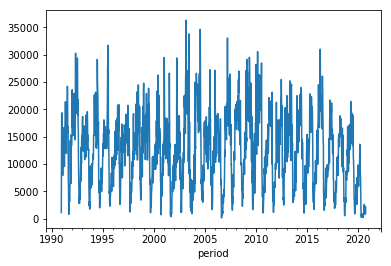

In [10]:
sorted_data['inc'].plot()
plt.show()

Un zoom sur les dernières années montre mieux avec un haut taux annuel excepté en Septembre / Octobre où les cas sont bien moins nombreux

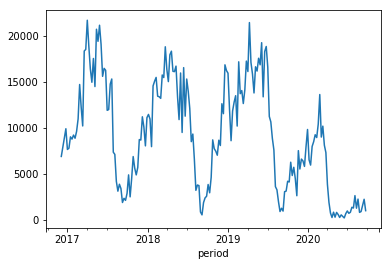

In [11]:
sorted_data['inc'][-200:].plot()
plt.show()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval entre deux années civiles, nous définissons la période de référence entre deux minima de l'incidence, du 1er août de l'année $N$ au 1er Septembre de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes de référence: à la place du 1er août de chaque année, nous utilisons le premier jour de la semaine qui contient le 1er août.

Comme l'incidence de syndrome grippal est très faible en été, cette modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an octobre 1984, ce qui rend la première année incomplète. Nous commençons donc l'analyse en 1985.

In [12]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [13]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

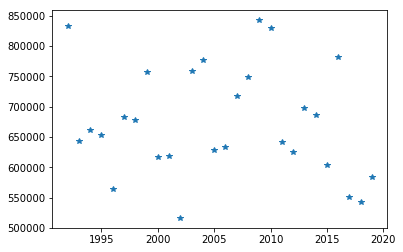

In [14]:
yearly_incidence.plot(style='*')
plt.show()

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [15]:
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Ainsi l'année avec le plus d'incidences a été en __2009__ et l'année avec le moins d'incidences à été en __2002__

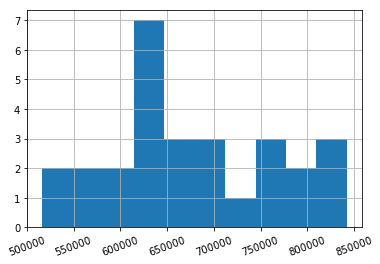

In [16]:
yearly_incidence.hist(xrot=20)
plt.show()